In [66]:
import folium
import pandas as pd
import json
import seaborn as sns
from folium import plugins
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [2]:
sbux = pd.read_csv('directory.csv')

In [3]:
nyc = sbux.copy()

In [4]:
latitude =sbux[['Latitude', 'Longitude']]

In [5]:
import numpy as np
np.sum(latitude.isnull())

Latitude     1
Longitude    1
dtype: int64

In [6]:
latitude = latitude.dropna(axis=0, how='any')

In [7]:
with open('us_states.geojson') as f:
    usArea = json.load(f)

In [8]:
usMap = folium.Map(location=[40.7128, -74.0060], tiles='Stamen Toner', zoom_start=9)
folium.GeoJson(usArea).add_to(usMap)
for i,row in latitude.iterrows():
    folium.CircleMarker((row.Latitude,row.Longitude), radius=3, weight=2, color='#00704A', fill_color='#00704A', fill_opacity=.5).add_to(usMap)

In [ ]:
sbuxlon = sbux[['Longitude', 'Latitude']]

In [9]:
usMap.save('USMap.html')

In [25]:
sbux = sbux.loc[sbux['Country'] == ('US' or 'USA')]

In [26]:
storecount = sbux.groupby('State/Province').count()

Text(0.5, 1.0, 'Starbucks Locations By State (Circa 2017)')

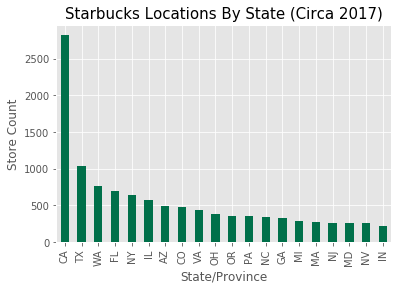

In [29]:
storecount.Brand.sort_values(ascending=False).head(20).plot.bar(color='#00704A')
plt.ylabel('Store Count')
plt.title('Starbucks Locations By State (Circa 2017)', fontsize=15)

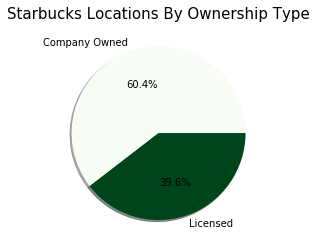

In [30]:
ownership = sbux.groupby('Ownership Type').count()['Brand'].plot.pie(autopct='%1.1f%%', shadow=True, colormap='Greens', label='')

plt.title('Starbucks Locations By Ownership Type', fontsize=15)

plt.savefig('ownership_bkdwn.png')

In [31]:
NY = sbux.loc[sbuxus['State/Province'].str.contains('NY')]

In [49]:
nyc['Postcode'] = nyc['Postcode'].astype('str')
sbux['Postcode'] = sbux['Postcode'].astype('str')

In [33]:
nyc['Postcode'] = [x[:5] for x in nyc['Postcode']]

In [34]:
num_stores = nyc.groupby('Postcode').count()

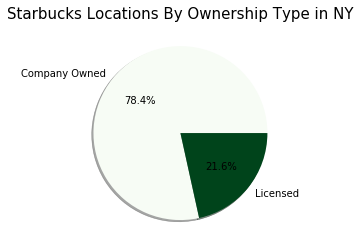

In [35]:
NY.groupby('Ownership Type').count()['Brand'].plot.pie(autopct='%1.1f%%', shadow=True, colormap='Greens', label='')

plt.title('Starbucks Locations By Ownership Type in NY', fontsize=15)

plt.savefig('ownership_bkdwn_NY.png')

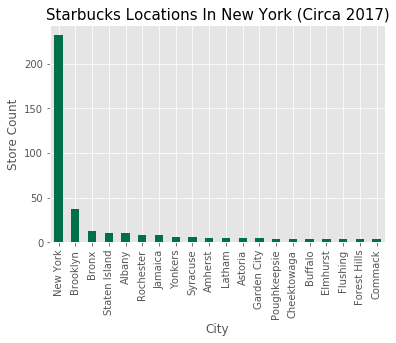

In [36]:
NY.groupby('City').count().Brand.sort_values(ascending=False).head(20).plot.bar(color='#00704A')
plt.ylabel('Store Count')
plt.title('Starbucks Locations In New York (Circa 2017)', fontsize=15)

plt.savefig('stores_by_city_NY.png')

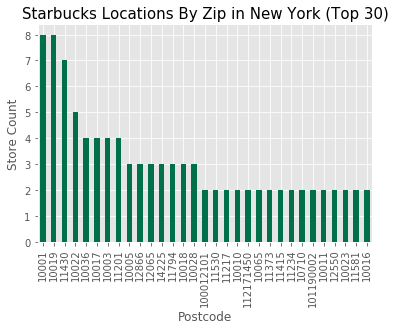

In [38]:
NY.groupby('Postcode').count().Brand.sort_values(ascending=False).head(31).plot.bar(color='#00704A')
plt.ylabel('Store Count')
plt.title('Starbucks Locations By Zip in New York (Top 30)', fontsize=15)

plt.savefig('stores_by_zip_NY.png')

In [39]:
zipcounty = pd.read_csv('zipcodes_by_county.csv')

In [40]:
def removeCountyTail(string):
    return string.replace(' County', '').replace(' Municipio', '')

zipcounty['COUNTYNAME'].apply(removeCountyTail)

0                  Autauga
1                  Autauga
2                  Autauga
3                  Autauga
4                  Autauga
               ...        
52884     St. Croix Island
52885     St. Croix Island
52886     St. Croix Island
52887      St. John Island
52888    St. Thomas Island
Name: COUNTYNAME, Length: 52889, dtype: object

In [55]:
zipcounty.head()

,COUNTYNAME,STATE,STCOUNTYFP,CLASSFP
ZIP,,,,
36003,Autauga County,AL,1001,H1
36006,Autauga County,AL,1001,H1
36067,Autauga County,AL,1001,H1
36066,Autauga County,AL,1001,H1
36703,Autauga County,AL,1001,H1


In [43]:
zipcounty['ZIP'] = zipcounty['ZIP'].astype('str')

In [44]:
zipcounty['ZIP'] = ['00' + x if len(x) < 4 else '0' + x if len(x) < 5 else x[:5] if len(x) > 5 else x for x in zipcounty['ZIP']]

In [45]:
zipcounty['ZIP'] = ['00' + x if len(x) < 4 else '0' + x if len(x) < 5 else x[:5] if len(x) > 5 else x for x in zipcounty['ZIP']]

In [ ]:
zipcounty = zipcounty.set_index('ZIP')

In [58]:
sbux.reset_index(drop=True, inplace=True)

In [50]:
sbux['Postcode'] = [x[:5] for x in sbux['Postcode']]

In [51]:
sbux = sbux.loc[sbux['Country'] == ('US' or 'USA')]

In [61]:
sbux = pd.read_csv('FINAL_FOR_ANALYSIS.csv', index_col = False)

In [ ]:
sbux['County'] = [zipcounty.loc[sbux['Postcode'][i]]['COUNTYNAME'] for i in range(sbux.shape[0])]

In [62]:
pd.set_option('display.max_columns', None)

In [64]:
normalized = sbux.loc[sbux['TotalPop'].apply(lambda x: np.abs(x - sbux['TotalPop'].mean()) / sbux['TotalPop'].std() < 2)]

In [70]:
sbux.head()

,Company Owned,Licensed,state,County,Store Number,CensusId,State,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,stateabbr
0,1.0,1.0,SC,Abbeville,2.0,45001,South Carolina,24997,12308,12689,1.2,68.9,27.9,0.1,0.0,0.0,19399,34799.0,2097.0,18112,771,22.5,33.4,25.4,18.6,19.6,11.1,25.3,83.3,10.9,0.2,1.6,1.0,3.0,27.8,9294,80.2,13.5,6.2,0.0,10.7,SC
1,17.0,18.0,ID,Ada,35.0,16001,Idaho,417501,208879,208622,7.6,85.5,1.1,0.5,2.6,0.2,298836,56356.0,1082.0,28851,622,12.3,13.7,42.4,16.8,25.4,7.2,8.2,79.9,8.0,0.5,2.0,2.8,6.9,20.0,199955,77.2,15.8,6.9,0.1,6.6,ID
2,NaN,1.0,MO,Adair,1.0,29001,Missouri,25560,12147,13413,2.4,91.5,2.1,0.3,2.2,0.3,20427,37516.0,3100.0,19671,950,26.9,20.0,34.9,20.1,23.8,8.0,13.2,77.3,9.4,0.2,6.8,2.6,3.7,17.4,11096,71.8,22.3,5.9,0.0,7.9,MO
3,32.0,27.0,CO,Adams,68.0,8001,Colorado,471206,237107,234099,38.6,52.1,3.0,0.5,3.7,0.1,295079,58946.0,1016.0,25039,288,13.8,19.1,29.5,18.7,24.5,13.4,13.9,77.6,12.0,3.7,1.2,1.2,4.4,28.8,229743,83.6,11.3,5.0,0.1,7.9,CO
4,1.0,1.0,IL,Adams,68.0,17001,Illinois,67081,32676,34405,1.4,92.4,3.8,0.1,0.8,0.1,51386,45965.0,1350.0,24380,647,14.4,20.1,29.6,18.3,26.7,7.9,17.5,83.2,8.8,0.6,2.6,1.5,3.2,16.2,32400,83.4,10.7,5.6,0.2,6.8,IL


In [71]:
sbux['incounty'] = ~sbux['Store Number'].isnull()

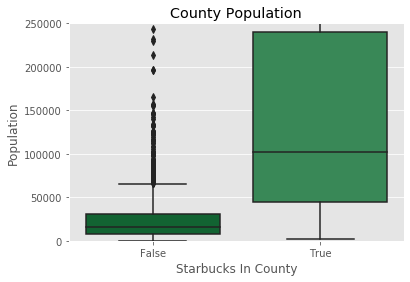

In [92]:
sns.boxplot(x=sbux['incounty'], y=sbux['TotalPop']).set(ylim=(0, 250000))
plt.ylabel('Population')
plt.xlabel('Starbucks In County')
plt.title('County Population')
sns.set_palette("BuGn_r")

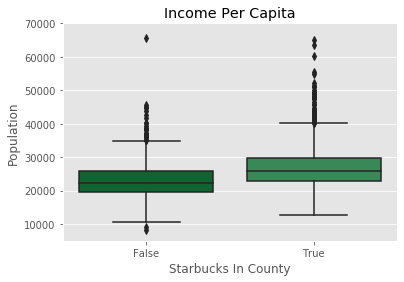

In [91]:
sns.boxplot(x=sbux['incounty'], y=sbux['IncomePerCap']).set(ylim=(5000, 70000))
plt.ylabel('Population')
plt.xlabel('Starbucks In County')
plt.title('Income Per Capita')
sns.set_palette("BuGn_r")

Text(0.5, 1.0, 'Private Workforce')

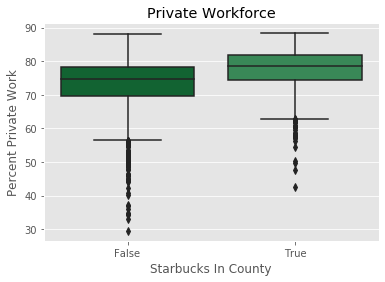

In [74]:
sns.boxplot(x=sbux['incounty'], y=sbux['PrivateWork'])#.set(ylim=(0, 50000))
plt.ylabel('Percent Private Work')
plt.xlabel('Starbucks In County')
plt.title('Private Workforce')

Text(0.5, 1.0, 'Household Income')

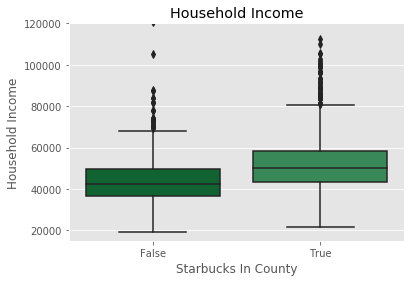

In [75]:
sns.boxplot(x=sbux['incounty'], y=sbux['Income']).set(ylim=(15000, 120000))
plt.ylabel('Household Income')
plt.xlabel('Starbucks In County')
plt.title('Household Income')

Text(0.5, 1.0, 'Population Employed')

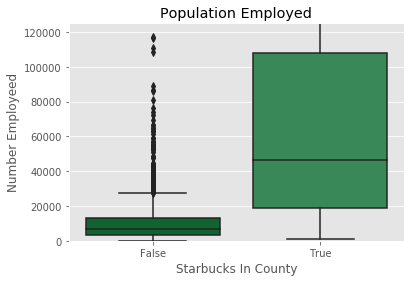

In [88]:
sns.boxplot(x=sbux['incounty'], y=sbux['Employed']).set(ylim=(0, 125000))
plt.ylabel('Number Employeed')
plt.xlabel('Starbucks In County')
plt.title('Population Employed')

In [89]:
corr = sbux[['Licensed', 'Company Owned', 'Store Number', 'TotalPop', 'Professional', 'Office', 'WorkAtHome', 'Drive', 'IncomePerCap', 'MeanCommute', 'Employed', 'Unemployment']].corr()

In [90]:
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Licensed,Company Owned,Store Number,TotalPop,Professional,Office,WorkAtHome,Drive,IncomePerCap,MeanCommute,Employed,Unemployment
Licensed,1.00,0.87,0.71,0.85,0.22,0.08,0.06,-0.14,0.20,0.16,0.86,0.02
Company Owned,0.87,1.00,0.76,0.89,0.23,0.02,0.11,-0.30,0.25,0.19,0.90,0.05
Store Number,0.71,0.76,1.00,0.65,0.21,0.03,0.07,-0.16,0.18,0.15,0.66,-0.00
TotalPop,0.85,0.89,0.65,1.00,0.25,0.19,-0.03,-0.13,0.25,0.15,1.00,0.05
Professional,0.22,0.23,0.21,0.25,1.00,-0.00,0.40,-0.32,0.70,-0.10,0.27,-0.33
Office,0.08,0.02,0.03,0.19,-0.00,1.00,-0.24,0.27,0.11,0.15,0.19,0.11
WorkAtHome,0.06,0.11,0.07,-0.03,0.40,-0.24,1.00,-0.63,0.27,-0.20,-0.03,-0.29
Drive,-0.14,-0.30,-0.16,-0.13,-0.32,0.27,-0.63,1.00,-0.21,0.14,-0.13,0.13
IncomePerCap,0.20,0.25,0.18,0.25,0.70,0.11,0.27,-0.21,1.00,0.04,0.28,-0.48
MeanCommute,0.16,0.19,0.15,0.15,-0.10,0.15,-0.20,0.14,0.04,1.00,0.15,0.29
